In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df.head()

,Series_Title,Released_Year,Certificate,Runtime (min),Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# Movies per Year

In [18]:
release_years = df["Released_Year"].value_counts()

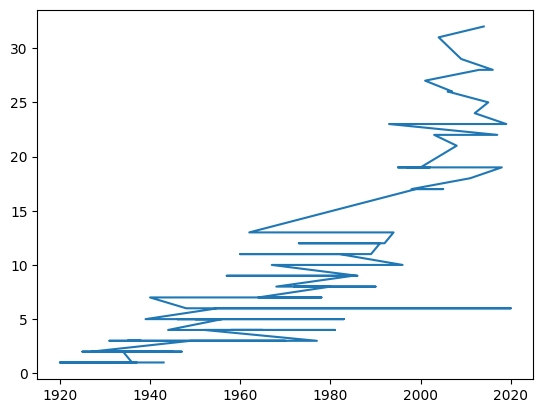

In [19]:
plt.plot(release_years.index, release_years.values)
plt.show()

That doesn't look right

In [30]:
sorted_release_years = df["Released_Year"].unique() # Just for diplaying the unique release years
sorted_release_years.sort()
sorted_release_years

array([1920, 1921, 1922, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

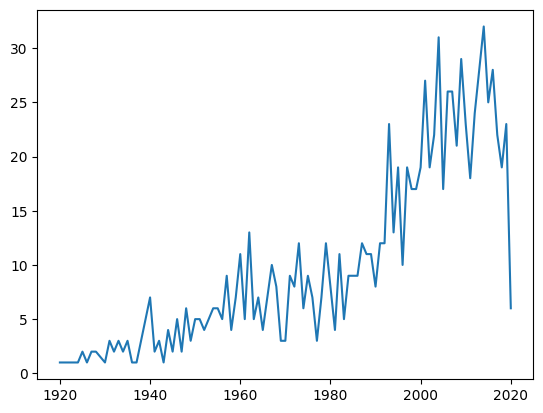

In [36]:
release_years = release_years.sort_index()
plt.plot(release_years.index, release_years.values)
plt.show()

In [38]:
release_years.tail(6)

Released_Year
2015    25
2016    28
2017    22
2018    19
2019    23
2020     6
Name: count, dtype: int64

The dataset might not be representitive of the entire year of 2020. So I'll remove that year from this graph.

In [40]:
release_years = release_years.drop(2020, axis="index")
release_years.tail()

Released_Year
2015    25
2016    28
2017    22
2018    19
2019    23
Name: count, dtype: int64

In [77]:
print("Min movie releases in a year:",release_years.min())
print("Max movie releases in a year:", release_years.max())

Min movie releases in a year: 1
Max movie releases in a year: 32


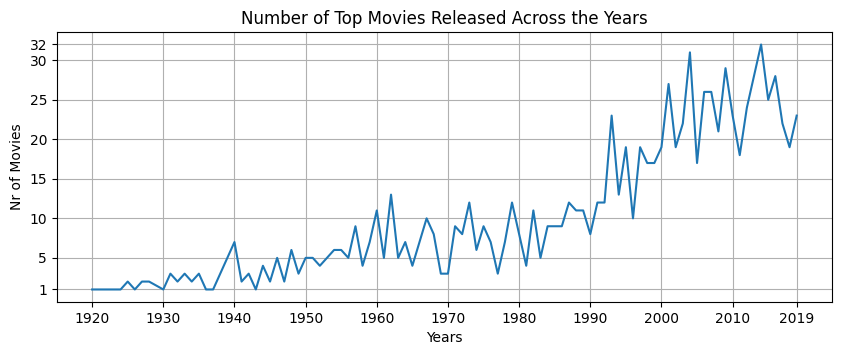

In [78]:
plt.figure(figsize=(10, 3.5))
plt.plot(release_years.index, release_years.values)
plt.title("Number of Top Movies Released Across the Years")
plt.xlabel("Years")
plt.ylabel("Nr of Movies")
plt.grid()
plt.xticks([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2019])
plt.yticks([1, 5, 10, 15, 20, 25, 30, 32])
plt.show()

# Heading 2